In [400]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq, fsolve
from numpy.linalg import eig
import seaborn as sns
from sympy import *


In [401]:
kon = 1e5
Ainnit = 1e-5
k = kon*Ainnit
rho = 0.2
delta = 4
koff = 1e-4

In [402]:
A0s = np.linspace(0, 1, 50)
sol_A2_1 = []
sol_A2_2 = []
x = Symbol('x')

for A0 in A0s:
    expres1 = -2*k*(rho)*A0*(1-((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))) + koff*(1-A0-x)*((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))
    sol_A2_1.append(solveset(expres1, x, Reals))
    
    expres2 = k*delta*rho*(1-A0-x)*(1 - ((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*A0))) -2*koff*x*((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*x))
    sol_A2_2.append(solveset(expres2, x, Reals))

In [403]:
print(sol_A2_1)

[{1.0}, {0.848036285821901, 1.1315555509128}, {0.780677666432431, 1.17850600703696}, {0.727699606483181, 1.2110759037209}, {0.682353878239767, 1.23601346869901}, {0.642007980479804, 1.25595120319367}, {0.6053033747273, 1.27224764568086}, {0.571428571428741, 1.28571428571411}, {0.539852306306319, 1.29688238757123}, {0.510204081632574, 1.30612244897967}, {0.482213290051888, 1.31370507729496}, {0.455675196740135, 1.31983500734149}, {0.430430565301803, 1.3246714755146}, {0.406352775588778, 1.32834110196224}, {0.383339315663669, 1.33094639862195}, {0.361305957784159, 1.33257159323624}, {0.34018265058826, 1.33328673716692}, {0.319910547456796, 1.33315067703299}, {0.300439809805625, 1.33221325141877}, {0.28172795275394, 1.33051694520506}, {0.263738579167026, 1.32809815552675}, {0.246440397480678, 1.32498817394788}, {0.229806450729841, 1.3212139574335}, {0.213813505433907, 1.31679873946421}, {0.198441563388141, 1.31176251824441}, {0.183673469387935, 1.30612244897939}, {0.169494594933658, 1.299

In [404]:
def r1(x, A0):
    return (2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x)

print(r1(0.35467733866933465, 0.3554248268256095))

0.9997329545090132


object


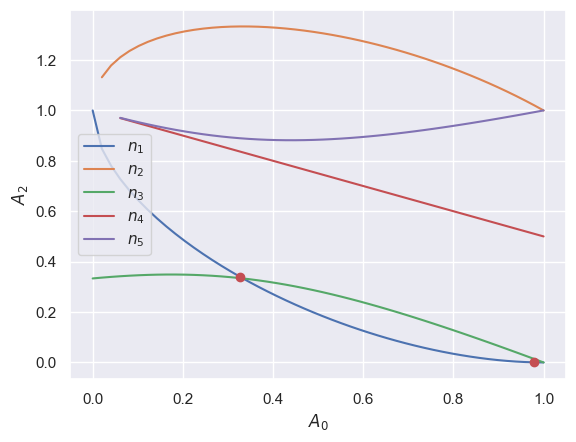

In [405]:
vals1 = []
vals2 = []
vals3 = []
vals4 = []
vals5 = []
for i in range(len(sol_A2_1)-1):
    nums = list(sol_A2_1[i])
    vals1.append(nums[0])
    
    if len(nums) == 1:
        vals2.append(nan)
    else:
        vals2.append(nums[1])

for i in range(len(sol_A2_2)-1):
    nums2 = list(sol_A2_2[i])
    vals3.append(nums2[0])

    if len(nums2) == 1:
        vals4.append(nan)
        vals5.append(nan)

    if len(nums2) == 3:
        vals4.append(nums2[1])
        vals5.append(nums2[2])


last_elems1 = sol_A2_1[-1].args
vals1.append(last_elems1[1])
vals2.append(last_elems1[0])

last_elems2 = sol_A2_2[-1].args
vals3.append(last_elems2[2])
vals4.append(last_elems2[0])
vals5.append(last_elems2[1])

sns.set_theme()
plt.plot(A0s, vals1, label=r'$n_1$')
plt.plot(A0s, vals2, label=r'$n_2$')
plt.plot(A0s, vals3, label=r'$n_3$')
plt.plot(A0s, vals4, label=r'$n_4$')
plt.plot(A0s, vals5, label=r'$n_5$')

idx = np.argwhere(np.diff(np.sign(np.array(vals1) - np.array(vals3)))).flatten()
for x in idx:
    plt.plot(A0s[x], vals1[x], 'ro')

print(np.sign(np.array(vals1) - np.array(vals3)).dtype)

plt.xlabel(r'$A_0$')
plt.ylabel(r'$A_2$')
plt.legend(loc='best')
#plt.ylim(-0.1, 1)
#plt.xlim(0, 1.1)
plt.show()

In [406]:
A0s = np.linspace(0, 1, 1000)
sol_A2_1_0 = []
sol_A2_2_0 = []

def expres1(x, A0):
    return -2*k*((2*k*A0 + k*delta*(1 - A0 - x) -koff*(1 - A0 - x) -2*koff*x)/(2*k*A0 + k*delta*(1-A0-x)))*A0*(1-((2*k*A0 + k*delta*(1 - A0 - x) -koff*(1 - A0 - x) -2*koff*x)/(2*k*A0 + k*delta*(1-A0-x)))) + koff*(1-A0-x)*(2*k*A0 + k*delta*(1 - A0 - x) -koff*(1 - A0 - x) -2*koff*x)/(2*k*A0 + k*delta*(1-A0-x))

def expres2(x, A0): 
    return k*delta*((2*k*A0 + k*delta*(1 - A0 - x) -koff*(1 - A0 - x) -2*koff*x)/(2*k*A0 + k*delta*(1-A0-x)))*(1-A0-x)*(1-((2*k*A0 + k*delta*(1 - A0 - x) -koff*(1 - A0 - x) -2*koff*x)/(2*k*A0 + k*delta*(1-A0-x)))) - 2*koff*x*((2*k*A0 + k*delta*(1 - A0 - x) -koff*(1 - A0 - x) -2*koff*x)/(2*k*A0 + k*delta*(1-A0-x)))

for A0 in A0s:
    sol_A2_1_0.append(fsolve(expres1, 0.0, args = (A0, ), factor=0.5))
    sol_A2_2_0.append(fsolve(expres2, 0.33, args = (A0, ), factor=0.1))
    

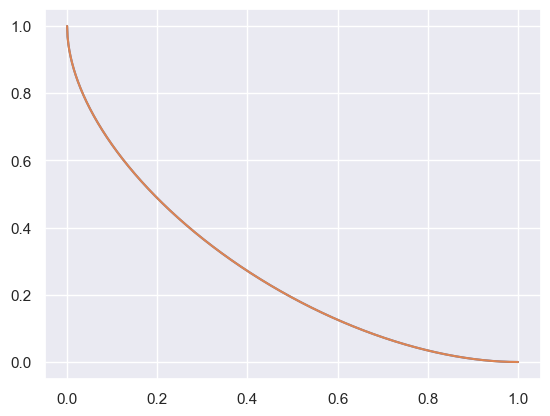

In [407]:
plt.plot(A0s, sol_A2_1_0)
plt.plot(A0s, sol_A2_2_0)

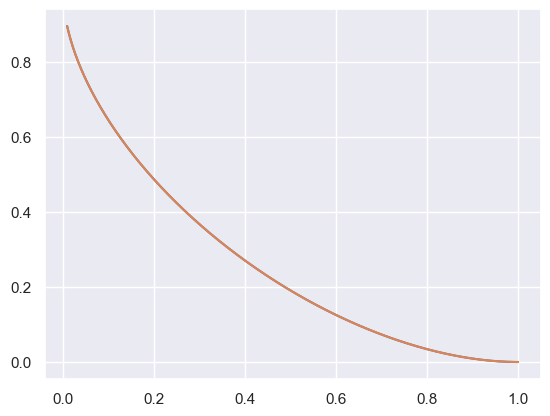

In [408]:
sol_A2_3 = []
sol_A2_4 = []

A0s = np.linspace(0.01, 1, 1000)

def expres1A(x, A0):
    return k*delta*(1 - ((koff*(1-A0-x))/(2*k*A0)))*(1-A0-x)*(1-(1 - ((koff*(1-A0-x))/(2*k*A0)))) - 2*koff*x*(1 - ((koff*(1-A0-x))/(2*k*A0)))

def expres2A(x, A0):
    return 2*k*(1 - ((koff*(1-A0-x))/(2*k*A0)))*A0*(1-(1 - ((koff*(1-A0-x))/(2*k*A0)))) - koff*(1-A0-x)*(1 - ((koff*(1-A0-x))/(2*k*A0))) + k*delta*(1 - ((koff*(1-A0-x))/(2*k*A0)))*(1-A0-x)*(1 - (1 - ((koff*(1-A0-x))/(2*k*A0)))) - 2*koff*x*(1 - ((koff*(1-A0-x))/(2*k*A0)))

for A0 in A0s:
    sol_A2_3.append(fsolve(expres1A, -1.0, args = (A0, ), factor=0.1))
    sol_A2_4.append(fsolve(expres2A, -1.0, args = (A0, ), factor=0.1))

plt.plot(A0s, sol_A2_3)
plt.plot(A0s, sol_A2_4)

/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_95910/1773420985.py:7: RuntimeWarning: invalid value encountered in divide
  return -2*k*A0*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))*(1-(1 - ((2*koff*x)/(k*delta*(1-A0-x))))) + koff*(1-A0-x)*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))
/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_95910/1773420985.py:10: RuntimeWarning: invalid value encountered in divide
  return 2*k*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))*A0*(1-(1 - ((2*koff*x)/(k*delta*(1-A0-x))))) - koff*(1-A0-x)*(1 - ((2*koff*x)/(k*delta*(1-A0-x)))) + k*delta*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))*(1-A0-x)*(1-(1 - ((2*koff*x)/(k*delta*(1-A0-x))))) - 2*koff*x*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))


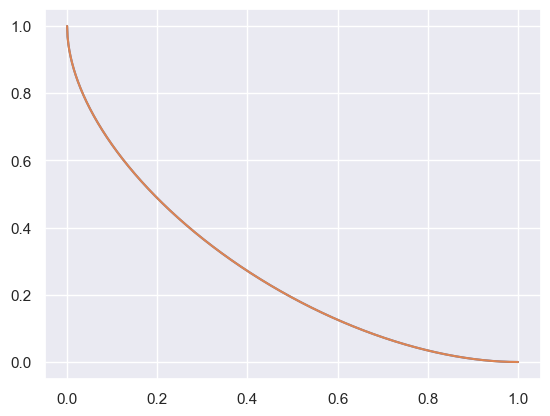

In [409]:
sol_A2_5 = []
sol_A2_6 = []

A0s = np.linspace(0, 1, 1000)

def expres1B(x, A0):
    return -2*k*A0*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))*(1-(1 - ((2*koff*x)/(k*delta*(1-A0-x))))) + koff*(1-A0-x)*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))

def expres2B(x, A0):
    return 2*k*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))*A0*(1-(1 - ((2*koff*x)/(k*delta*(1-A0-x))))) - koff*(1-A0-x)*(1 - ((2*koff*x)/(k*delta*(1-A0-x)))) + k*delta*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))*(1-A0-x)*(1-(1 - ((2*koff*x)/(k*delta*(1-A0-x))))) - 2*koff*x*(1 - ((2*koff*x)/(k*delta*(1-A0-x))))

for A0 in A0s:
    sol_A2_5.append(fsolve(expres1B, 0.0, args = (A0, ), factor=0.1))
    sol_A2_6.append(fsolve(expres2B, 0.0, args = (A0, ), factor=0.1))

plt.plot(A0s, sol_A2_5)
plt.plot(A0s, sol_A2_6)

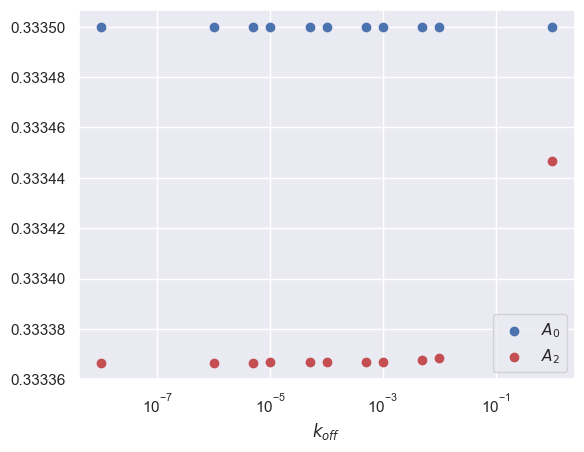

In [410]:
koffs = [1e-8, 1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 1]
Ainnit = 1e-5
delta = 4
kon = 1e5
k = kon*Ainnit
A_0_vals = []
A_2_vals = []

A0s = np.linspace(0, 1, 2000)

def expres1C(x, A0, koff):
    return -2*k*(rho)*A0*(1-((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))) + koff*(1-A0-x)*((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))
def expres2C(x, A0, koff):
    return k*delta*rho*(1-A0-x)*(1 - ((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*A0))) -2*koff*x*((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*x))

for kon in koffs:
    sol_A2_7 = []
    sol_A2_8 = []
    for A0 in A0s:  
        sol_A2_7.append(float(fsolve(expres1C, 0.2, args = (A0, kon), factor=0.1)))
        sol_A2_8.append(float(fsolve(expres2C, 0.2, args = (A0, kon), factor=0.1)))

    idx = np.argwhere(np.diff(np.sign(np.array(sol_A2_7) - np.array(sol_A2_8)))).flatten()
    A_0_vals.append(sol_A2_7[idx[0]])
    A_2_vals.append(sol_A2_8[idx[0]])  


plt.scatter(koffs, A_0_vals, label = r'$A_0$', c='b')
plt.xscale('log')
plt.scatter(koffs, A_2_vals, label = r'$A_2$', c='r')
#plt.plot(kons, A_0_vals, 'b')
plt.legend(loc='best')
plt.xlabel(r'$k_{off}$')
plt.show()

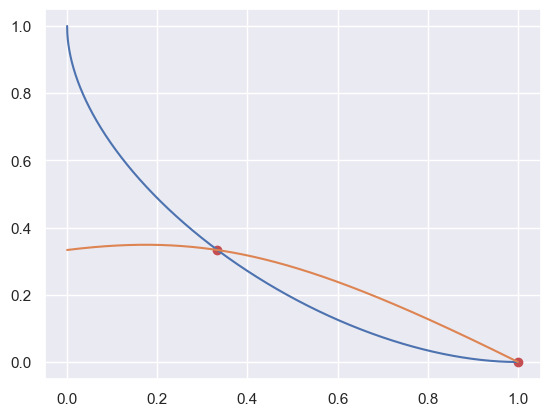

In [411]:
sol_A2_7 = []
sol_A2_8 = []

A0s = np.linspace(0, 1, 2000)

def expres1C(x, A0):
    return -2*k*(rho)*A0*(1-((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))) + koff*(1-A0-x)*((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))
def expres2C(x, A0):
    return k*delta*rho*(1-A0-x)*(1 - ((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*A0))) -2*koff*x*((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*x))

for A0 in A0s:
    sol_A2_7.append(float(fsolve(expres1C, 0.1, args = (A0, ), factor=0.1)))
    sol_A2_8.append(float(fsolve(expres2C, 0.1, args = (A0, ), factor=0.1)))

idx = np.argwhere(np.diff(np.sign(np.array(sol_A2_7) - np.array(sol_A2_8)))).flatten()
for x in idx:
    plt.plot(A0s[x], sol_A2_7[x], 'ro')

A2_val = sol_A2_7[idx[0]]
A0_val = A0s[idx[0]]
plt.plot(A0s, sol_A2_7)
plt.plot(A0s, sol_A2_8)

In [412]:
print(A0_val, A2_val)

0.3331665832916458 0.33350011118523326


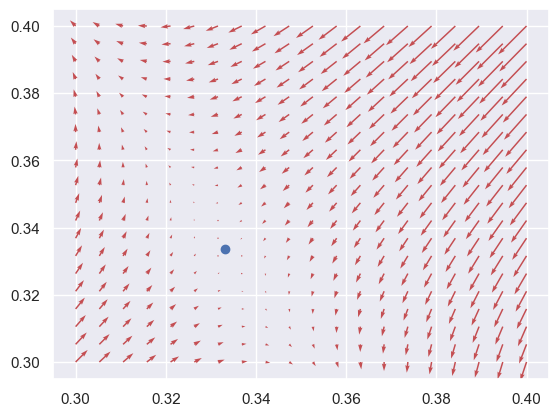

In [413]:
def f(Y, t):
    x, A0 = Y
    expres1 = -2*k*(rho)*A0*(1-((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))) + koff*(1-A0-x)*((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))
    expres2 = k*delta*rho*(1-A0-x)*(1 - ((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*A0))) -2*koff*x*((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*x))
    return [expres1, expres2]

y1 = np.linspace(0.3, 0.4, 20)
y2 = np.linspace(0.3, 0.4, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')
plt.plot(A0_val, A2_val, 'bo')

In [414]:
x = Symbol('x')
A0 = Symbol('A0')

expres1 = -2*k*(rho)*A0*(1-((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))) + koff*(1-A0-x)*((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))
df1_dx= diff(expres1, x)
df1_dA0 = diff(expres1, A0)

expres2 = k*delta*rho*(1-A0-x)*(1 - ((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*A0))) -2*koff*x*((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*x))
df2_dx = diff(expres2, x)
df2_dA0 = diff(expres2, A0)

jacobian = [[float(df1_dx.evalf(subs={x:A2_val, A0: A0_val})), float(df1_dA0.evalf(subs={x:A2_val, A0: A0_val}))],
            [float(df2_dx.evalf(subs={x:A2_val, A0: A0_val})), float(df2_dA0.evalf(subs={x:A2_val, A0: A0_val}))]]

eig(jacobian)


(array([-0.00039992,  0.00013333]),
 array([[-0.70719523,  0.51459038],
        [-0.70701832, -0.85743615]]))

In [415]:
def f1(A0, A2, r1):
    return -2*k*rho*A0*(1-r1) + koff*(1-A0-A2)*r1

def f2(A0, A2, r1):
    return k*delta*rho*(1-A0-A2)*(1-r1) - 2*koff*A2*r1

def f3(A0, A2, r1):
    return 2*k*rho*A0*(1-r1) - koff*(1-A0-A2)*r1 + k*delta*rho*(1-A0-A2)*(1-r1) - 2*koff*A2*r1

In [416]:
A0 = Symbol('A0')
A2 = Symbol('A2')
r1 = Symbol('r1')

f1 = -2*k*rho*A0*(1-r1) + koff*(1-A0-A2)*r1
f2 = k*delta*rho*(1-A0-A2)*(1-r1) - 2*koff*A2*r1
f3 = 2*k*rho*A0*(1-r1) - koff*(1-A0-A2)*r1 + k*delta*rho*(1-A0-A2)*(1-r1) - 2*koff*A2*r1

df1dA0 = diff(f1, A0)
df1dA2 = diff(f1, A2)
df1dr1 = diff(f1, r1)

df2dA0 = diff(f2, A0)
df2dA2 = diff(f2, A2)
df2dr1 = diff(f2, r1)

df3dA0 = diff(f3, A0)
df3dA2 = diff(f3, A2)
df3dr1 = diff(f3, r1)

f11 = float(df1dA0.evalf(subs={A0:0.35467733866933465, A2:0.3554248268256095, r1:0.9999546888560419}))
f12 = float(df1dA2.evalf(subs={A0:0.35467733866933465, A2:0.3554248268256095, r1:0.9999546888560419}))
f13 = float(df1dr1.evalf(subs={A0:0.35467733866933465, A2:0.3554248268256095, r1:0.9999546888560419}))
f21 = float(df2dA0.evalf(subs={A0:0.35467733866933465, A2:0.3554248268256095, r1:0.9999546888560419}))
f22 = float(df2dA2.evalf(subs={A0:0.35467733866933465, A2:0.3554248268256095, r1:0.9999546888560419}))
f23 = float(df2dr1.evalf(subs={A0:0.35467733866933465, A2:0.3554248268256095, r1:0.9999546888560419}))
f31 = float(df3dA0.evalf(subs={A0:0.35467733866933465, A2:0.3554248268256095, r1:0.9999546888560419}))
f32 = float(df3dA2.evalf(subs={A0:0.35467733866933465, A2:0.3554248268256095, r1:0.9999546888560419}))
f33 = float(df3dr1.evalf(subs={A0:0.35467733866933465, A2:0.3554248268256095, r1:0.9999546888560419}))

#########f11 = float(df1dA0.evalf(subs={A0:1.0, A2:0, r1:1}))
########f12 = float(df1dA2.evalf(subs={A0:1.0, A2:0, r1:1}))
#######f13 = float(df1dr1.evalf(subs={A0:1.0, A2:0, r1:1}))
######f21 = float(df2dA0.evalf(subs={A0:1.0, A2:0, r1:1}))
#####f22 = float(df2dA2.evalf(subs={A0:1.0, A2:0, r1:1}))
####f23 = float(df2dr1.evalf(subs={A0:1.0, A2:0, r1:1}))
###f31 = float(df3dA0.evalf(subs={A0:1.0, A2:0, r1:1}))
##f32 = float(df3dA2.evalf(subs={A0:1.0, A2:0, r1:1}))
#f33 = float(df3dr1.evalf(subs={A0:1.0, A2:0, r1:1}))
jacobian = [[f11, f12, f13],
            [f21, f22, f23],
            [f31, f32, f33]]

print(eig(jacobian)[0])

[-3.74004895e-01  3.88920137e-18 -2.38742504e-04]


In [417]:
deltas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A_0_vals = []
A_2_vals = []

A0s = np.linspace(0, 1, 2000)

def expres1C(x, A0, delta):
    return -2*k*(rho)*A0*(1-((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))) + koff*(1-A0-x)*((2*k*(rho)*A0 + k*delta*(rho)*(1-A0-x))/(2*k*(rho)*A0 + koff*(1-A0-x) + k*delta*(rho)*(1-A0-x) + 2*koff*x))
def expres2C(x, A0, delta):
    return k*delta*rho*(1-A0-x)*(1 - ((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*A0))) -2*koff*x*((2*k*rho*A0 + k*delta*rho*(1-A0-x))/(2*k*rho*A0 + koff*(1-A0-x) + k*delta*rho*(1-A0-x) + 2*koff*x))

for delta in deltas:
    for A0 in A0s:  
        sol_A2_7 = []
        sol_A2_8 = []
        sol_A2_7.append(float(fsolve(expres1C, 0.2, args = (A0, delta), factor=0.1)))
        sol_A2_8.append(float(fsolve(expres2C, 0.2, args = (A0, delta), factor=0.1)))
    print(len(sol_A2_7), len(sol_A2_8))

    idx = np.argwhere(np.diff(np.sign(np.array(sol_A2_7) - np.array(sol_A2_8)))).flatten()
    print(idx)
    A_0_vals.append(sol_A2_7[idx[0]])
    A_2_vals.append(sol_A2_8[idx[0]])  


plt.plot(deltas, A_0_vals, label = r'$A_0$')
plt.plot(deltas, A_2_vals, label = r'$A_2$')
plt.legend(loc='best')
plt.xlabel(r'$\delta$')
plt.show()

1 1
[]


IndexError: index 0 is out of bounds for axis 0 with size 0